# Lesson 3 Codealong
Instructor: Amy Roberts, PhD

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 'example3' : [55, 47, 38, 66, 56, 64, 44, 39], 'example4' : [75, 87, 73, 84, 98, 92, 345, 11] })
print df


   example1  example2  example3  example4
0        18        75        55        75
1        24        87        47        87
2        17        49        38        73
3        21        68        66        84
4        24        75        56        98
5        16        84        64        92
6        29        98        44       345
7        18        92        39        11


#### Instructor example: Calculate the mean for each coloumn

In [5]:
travel_sample = pd.read_csv('C:/Ravi/Career/travel_time.csv')
travel_sample.head(10)



,right,left
0,25,100
1,22,20
2,60,90
3,45,40
4,60,65
5,0,30


           right        left
count   6.000000    6.000000
mean   35.333333   57.500000
std    23.846733   32.825295
min     0.000000   20.000000
25%    22.750000   32.500000
50%    35.000000   52.500000
75%    56.250000   83.750000
max    60.000000  100.000000
Axes(0.125,0.125;0.775x0.775)


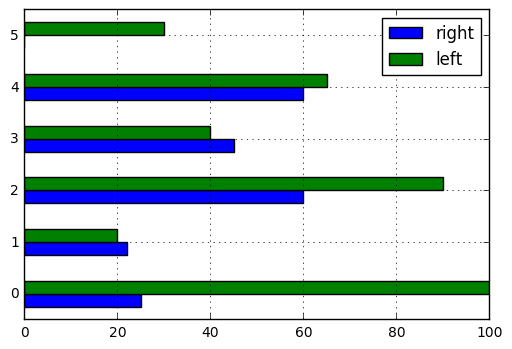

In [10]:
#print 'travel_sample[left]:',travel_sample['left'].describe()
#print 'travel_sample[right]:', travel_sample['right'].describe()
print travel_sample.describe()
print travel_sample.plot.barh(grid = True)

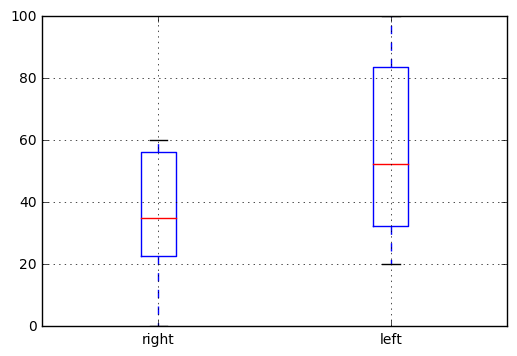

In [13]:
abc = travel_sample.plot.box(grid=True)

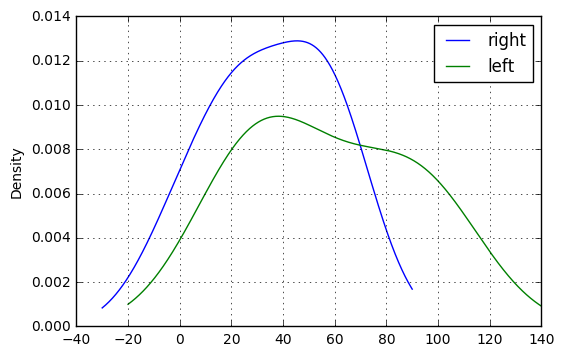

In [14]:
travel_sample.plot.density(grid=True);

NameError: name 'path' is not defined

In [20]:
df.mean()

example1     20.875
example2     78.500
example3     51.125
example4    108.125
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [7]:
#maximum
df.max()

example1     29
example2     98
example3     66
example4    345
dtype: int64

In [8]:
#minimum
df.min()

example1    16
example2    49
example3    38
example4    11
dtype: int64

In [9]:
#median
df.median()

example1    19.5
example2    79.5
example3    51.0
example4    85.5
dtype: float64

In [10]:
#mode
df.mode()

,example1,example2,example3,example4
0,18,75.0,NaN,NaN
1,24,NaN,NaN,NaN


In [11]:
df.describe()

,example1,example2,example3,example4
count,8.00000,8.000000,8.000000,8.000000
mean,20.87500,78.500000,51.125000,108.125000
std,4.48609,15.445758,10.776131,99.473525
min,16.00000,49.000000,38.000000,11.000000
25%,17.75000,73.250000,42.750000,74.500000
50%,19.50000,79.500000,51.000000,85.500000
75%,24.00000,88.250000,58.000000,93.500000
max,29.00000,98.000000,66.000000,345.000000


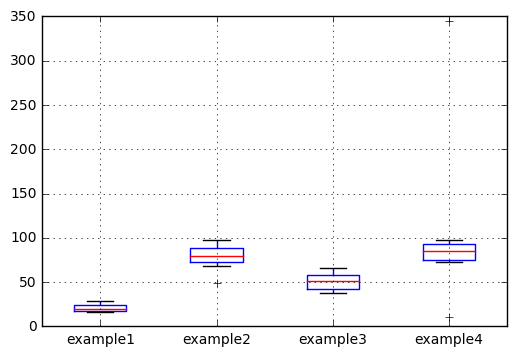

In [15]:
df.plot.box(grid = True);

### Part 2. Box Plot

#### Instructor: Interquartile range 

In [50]:
print "50% Quartile:"
print df.quantile(.50) 
print "Median (red line of the box)"
print df.median()

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
example4    85.5
dtype: float64
Median (red line of the box)
example1    19.5
example2    79.5
example3    51.0
example4    85.5
dtype: float64


In [51]:
print"25% (bottome of the box)"
print df.quantile(0.25)
print"75% (top of the box)"
print df.quantile(0.75)

25% (bottome of the box)
example1    17.75
example2    73.25
example3    42.75
example4    74.50
dtype: float64
75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
example4    93.50
dtype: float64


7     11
2     73
0     75
3     84
1     87
5     92
4     98
6    345
Name: example4, dtype: int64


count      8.000000
mean     108.125000
std       99.473525
min       11.000000
25%       74.500000
50%       85.500000
75%       93.500000
max      345.000000
Name: example4, dtype: float64

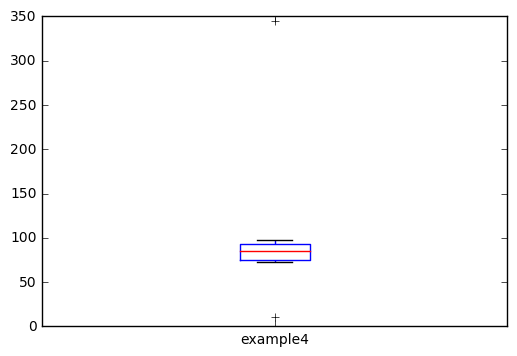

In [52]:
df['example4'].plot(kind='box')

print df.example4.sort_values()

df['example4'].describe()
#df.plot(kind='scatter', x='example1', y='example2')

#### Student: Create plots for examples 2 and 3 and check the quartiles

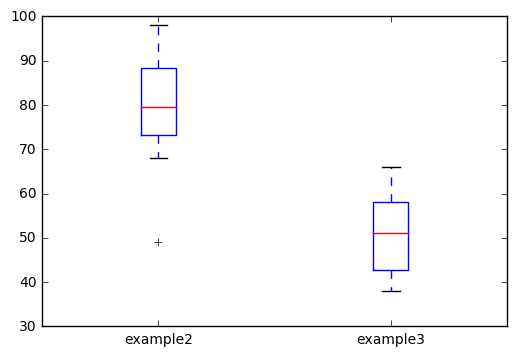

In [27]:
df[['example2', 'example3']].plot.box();
#(grid =True);

#### What does the cross in example 2 represent?

Answer: 

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='../../assets/images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='../../assets/images/samplevarstd.png', style="width: 50%; height: 50%")>

In [53]:
#example1
mean = df["example1"].mean()
n= df["example1"].count()

print df["example1"]
print mean
print n


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64
20.875
8


In [ ]:
# written out by hand for instructional purposes 
#if there is time, have the students refactor this to create a function to calculate variance for any dataset
#find the squared distance from the mean

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

#sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print numerator 
print denominator
print variance



In [ ]:
# in pandas
print "Variance"
print df["example1"].var()

#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [28]:
#find the variance for each dataset
df.var()

example1      20.125000
example2     238.571429
example3     116.125000
example4    9894.982143
dtype: float64

In [ ]:
#calculate standard deviation by hand


In [29]:
#now do it with pandas!
df.std()

example1     4.486090
example2    15.445758
example3    10.776131
example4    99.473525
dtype: float64

In [30]:
df['example1'].std()

4.4860896112315904

#### Short Cut!

In [ ]:
df.describe()

#### Student: Check understanding 
Which value in the above table is the median? 

Answer: 

### Part 4: Correlation

In [54]:
df.corr()

,example1,example2,example3,example4
example1,1.000000,0.477283,-0.123745,0.772514
example2,0.477283,1.000000,-0.057076,0.416593
example3,-0.123745,-0.057076,1.000000,-0.094105
example4,0.772514,0.416593,-0.094105,1.000000
